#Boosting Techniques | Assignment

#Question 1: What is Boosting in Machine Learning? Explain how it improves weak learners.

**Boosting** is a powerful ensemble machine learning technique that combines multiple "weak" or "base" learners (models that perform slightly better than random guessing) into a single "strong" learner. The core idea is to iteratively improve the model's performance by focusing on the examples that previous weak learners misclassified.

### How it improves weak learners:

1.  **Sequential Learning:** Unlike bagging (e.g., Random Forest) where models are trained independently, boosting trains models sequentially. Each new weak learner is built to correct the errors of the previous ones.
2.  **Weighted Data:** In each iteration, boosting algorithms assign higher weights to the data points that were misclassified by the previous weak learners. This forces the subsequent learners to pay more attention to these difficult examples.
3.  **Weighted Voting/Averaging:** When making a final prediction, the predictions from all weak learners are combined, often with a weighted average or vote. More accurate weak learners (those that performed better on the data) are given higher influence in the final decision.

By repeatedly identifying and addressing the weaknesses of previous models, boosting gradually transforms a collection of simple, not-so-good models into a highly accurate and robust predictive model.

#Question 2: What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?

Both AdaBoost and Gradient Boosting are sequential ensemble methods that combine multiple weak learners to form a strong learner. However, they differ fundamentally in how they train these weak learners and combine their predictions:

### AdaBoost (Adaptive Boosting)

*   **Focus:** AdaBoost focuses on **misclassified data points**. In each iteration, it adjusts the weights of the training instances, giving more weight to observations that were misclassified by the previous weak learner.
*   **Weak Learner Training:** Each subsequent weak learner is trained on the re-weighted dataset, forcing it to pay more attention to the previously difficult examples.
*   **Weak Learner Contribution:** Each weak learner gets a weight assigned to it based on its accuracy. More accurate learners get higher weights in the final ensemble.
*   **Combination:** Predictions from all weak learners are combined through a weighted majority vote (for classification) or weighted sum (for regression), where learners with higher accuracy have more influence.
*   **Error Minimization:** It primarily minimizes an exponential loss function.

### Gradient Boosting

*   **Focus:** Gradient Boosting focuses on **errors (residuals) of the previous predictor**. Instead of re-weighting data points, it trains subsequent weak learners to predict the residuals (the difference between the actual value and the prediction of the current ensemble).
*   **Weak Learner Training:** Each new weak learner is trained to predict the "negative gradient" of the loss function with respect to the current ensemble's prediction. In simpler terms, it tries to correct the errors made by the sum of all previous models.
*   **Weak Learner Contribution:** Each weak learner's prediction is multiplied by a small learning rate (shrinkage) before being added to the ensemble, which helps prevent overfitting.
*   **Combination:** Predictions are combined by summing the predictions of all weak learners, each typically scaled by a learning rate. The final model is a sum of these individual models.
*   **Error Minimization:** It is a more generalized algorithm that can optimize any differentiable loss function by iteratively moving down the gradient of the loss function.

### Key Differences Summarized:

| Feature             | AdaBoost                                    | Gradient Boosting                                    |
| :------------------ | :------------------------------------------ | :--------------------------------------------------- |
| **Error Correction**| Re-weights misclassified instances          | Fits new models to residuals (negative gradients)    |
| **Loss Function**   | Typically exponential loss                  | Can optimize any differentiable loss function        |
| **Weak Learner Output** | Predicts the target variable directly   | Predicts the residuals (errors)                      |
| **Final Ensemble**  | Weighted sum/vote of weak learners          | Sum of weak learners' predictions (scaled by learning rate) |

In essence, AdaBoost iteratively corrects its errors by focusing on difficult data points, while Gradient Boosting iteratively corrects its errors by training new models to predict the remaining error from the previous models.

#Question 3: How does regularization help in XGBoost?

Regularization is a crucial aspect of XGBoost that helps prevent overfitting and improves the model's generalization capabilities. XGBoost incorporates two main types of regularization:

1.  **L1 Regularization (Lasso Regression):**
    *   Adds a penalty equal to the absolute value of the magnitude of coefficients. This encourages sparsity, meaning it can shrink some feature coefficients to zero, effectively performing feature selection.

2.  **L2 Regularization (Ridge Regression):**
    *   Adds a penalty equal to the square of the magnitude of coefficients. This penalizes large coefficients, making the model less sensitive to individual data points and promoting smaller, more stable weights.

### How Regularization Helps in XGBoost:

*   **Prevents Overfitting:** By penalizing complex models (e.g., trees with too many leaves or large coefficient values), regularization discourages the model from memorizing the training data, leading to better performance on unseen data.
*   **Controls Tree Complexity:** XGBoost specifically uses regularization terms in its objective function that penalize the number of leaves in a tree and the magnitude of the leaf weights. This prevents individual trees from becoming too complex and overfitting the training data.
*   **Feature Selection:** L1 regularization can drive the weights of less important features to zero, effectively selecting the most relevant features and simplifying the model.
*   **Smoother Models:** Regularization generally leads to smoother decision boundaries and more generalized models, reducing variance.

In essence, regularization in XGBoost acts as a control mechanism, balancing the model's ability to fit the training data with its ability to generalize to new, unseen data.

#Question 4: Why is CatBoost considered efficient for handling categorical data?

CatBoost is particularly efficient and effective for handling categorical features primarily due to its innovative approach to processing them. Unlike many other gradient boosting algorithms that require explicit one-hot encoding or other preprocessing of categorical features, CatBoost handles them internally.

Here are the key reasons:

1.  **Ordered Target Statistics (Ordered TS):** This is CatBoost's most distinctive feature for categorical data. Instead of computing the average target value for each category based on the entire dataset (which can lead to target leakage and overfitting), CatBoost uses a 'prior-based' approach. For each data point, it computes the target statistics (e.g., average target value) for a category using only the data points *before* the current one in a random permutation of the dataset. This prevents target leakage and results in more robust and generalized embeddings for categorical features.

2.  **Permutation-driven Ordering:** CatBoost generates multiple random permutations of the dataset. For each permutation, it calculates the ordered target statistics. This helps to reduce bias and variance that might arise from a single ordering.

3.  **Automatic Categorical Feature Combinations:** CatBoost can automatically combine different categorical features to create new, more informative features. For example, if you have 'City' and 'Product' as categorical features, CatBoost can create a new feature like 'City_and_Product' if it finds that this combination is predictive. This capability is especially powerful in datasets with many categorical features and complex interactions.

4.  **Handling of Rare Categories:** The ordered target statistics approach naturally handles rare categories better than traditional one-hot encoding, which can lead to very sparse matrices. By incorporating priors and considering the order, CatBoost can derive meaningful representations even for categories with few occurrences.

5.  **No Need for Extensive Preprocessing:** Because CatBoost handles categorical features internally, users don't need to manually perform one-hot encoding, label encoding, or other complex transformations. This simplifies the data preprocessing pipeline and reduces the chances of errors or target leakage.

In summary, CatBoost's intelligent use of Ordered Target Statistics, permutation-driven ordering, automatic feature combination, and internal handling mechanisms make it highly efficient and performant for datasets rich in categorical information, often outperforming other algorithms in such scenarios.

#Question 5: What are some real-world applications where boosting techniques are preferred over bagging methods?

Boosting techniques are often preferred over bagging methods in scenarios where high accuracy is paramount, and the dataset might have complex relationships or a need to focus on difficult-to-classify instances. Here are some real-world applications:

1.  **Fraud Detection:** In financial institutions, boosting algorithms like XGBoost and LightGBM are highly effective for detecting fraudulent transactions. They can learn from rare fraud patterns and adjust to misclassified cases, leading to higher recall and precision in identifying fraudulent activities.

2.  **Credit Scoring and Risk Assessment:** Banks and lending institutions use boosting for credit scoring, assessing the risk of loan defaults. Boosting models can capture intricate relationships between various financial indicators and borrower behavior, leading to more accurate risk predictions.

3.  **Image and Object Recognition:** While deep learning has become dominant, boosting (especially Gradient Boosting) has been successfully applied in various image processing tasks, particularly for feature-based recognition. For instance, Haar cascades (built using AdaBoost) were historically used in real-time face detection.

4.  **Medical Diagnosis:** Boosting can assist in diagnosing diseases by analyzing patient data, medical images, and laboratory results. Its ability to handle complex, often imbalanced, medical datasets helps in identifying subtle patterns indicative of a disease.

5.  **Customer Churn Prediction:** Telecommunication companies, subscription services, and other businesses use boosting to predict which customers are likely to churn (cancel their service). By focusing on customers at risk, companies can implement targeted retention strategies.

6.  **Ad Click-Through Rate (CTR) Prediction:** In online advertising, predicting whether a user will click on an ad is crucial. Boosting models are widely used to optimize ad placement by accurately predicting CTRs, improving advertising revenue.

7.  **Recommendation Systems:** Boosting can enhance recommendation engines by modeling complex user preferences and item characteristics. While not as common as collaborative filtering or matrix factorization, it can be used to rank items for recommendation.

8.  **Drug Discovery and Genomics:** In bioinformatics, boosting can be applied to classify molecules, predict drug efficacy, or identify genes associated with certain conditions by handling high-dimensional and complex biological data.

**Why boosting is preferred in these cases:**

*   **Higher Accuracy:** Boosting's iterative nature allows it to continuously improve performance by correcting errors of previous models, often leading to state-of-the-art accuracy on many tabular datasets.
*   **Handles Complex Relationships:** It can model non-linear relationships and interactions between features more effectively than simpler models.
*   **Focus on Hard Examples:** By giving more weight to misclassified instances (AdaBoost) or residuals (Gradient Boosting), it specifically targets and learns from the most challenging data points.
*   **Robust to Outliers (with proper tuning):** While sensitive to noisy data, with proper regularization and hyperparameter tuning, boosting can be quite robust and often performs well even with some outliers.

#Question 6: Write a Python program to:
##tasks.
- Train an AdaBoost Classifier on the Breast Cancer dataset
- Print the model accuracy

###Datasets:
- Use sklearn.datasets.load_breast_cancer() for classification tasks.
- Use sklearn.datasets.fetch_california_housing() for regression

In [1]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
bcs_data = load_breast_cancer()
X = bcs_data.data
y = bcs_data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the AdaBoost Classifier
adaboost_model = AdaBoostClassifier(random_state=42)

# Train the model
adaboost_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adaboost_model.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoost Classifier Accuracy on Breast Cancer Dataset: {accuracy:.4f}")

AdaBoost Classifier Accuracy on Breast Cancer Dataset: 0.9708


#Question 7: Write a Python program to:
- Train a Gradient Boosting Regressor on the California Housing dataset
- Evaluate performance using R-squared score

In [2]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load the California Housing dataset
california_housing_data = fetch_california_housing()
X_housing = california_housing_data.data
y_housing = california_housing_data.target

# Split the dataset into training and testing sets
X_train_housing, X_test_housing, y_train_housing, y_test_housing = train_test_split(X_housing, y_housing, test_size=0.3, random_state=42)

# Initialize the Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(random_state=42)

# Train the model
gbr_model.fit(X_train_housing, y_train_housing)

# Make predictions on the test set
y_pred_housing = gbr_model.predict(X_test_housing)

# Calculate and print the R-squared score
r2 = r2_score(y_test_housing, y_pred_housing)
print(f"Gradient Boosting Regressor R-squared score on California Housing Dataset: {r2:.4f}")

Gradient Boosting Regressor R-squared score on California Housing Dataset: 0.7803


#Question 8: Write a Python program to:
- Train an XGBoost Classifier on the Breast Cancer dataset
- Tune the learning rate using GridSearchCV
- Print the best parameters and accuracy

In [4]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# The Breast Cancer dataset (X, y) and split data (X_train, X_test, y_train, y_test) are already loaded from previous questions.
# If not, uncomment and run the following lines:
# from sklearn.datasets import load_breast_cancer
# from sklearn.model_selection import train_test_split
# bcs_data = load_breast_cancer()
# X = bcs_data.data
# y = bcs_data.target
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the XGBoost Classifier
xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)

# Define the parameter grid for GridSearchCV - tuning learning_rate
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

# Initialize GridSearchCV
# We use a smaller cv value (e.g., 3) for quicker execution in an example.
# For production, a higher cv value (e.g., 5 or 10) is recommended.
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print(f"Best parameters found: {grid_search.best_params_}")

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Make predictions on the test set with the best model
y_pred_tuned = best_xgb_model.predict(X_test)

# Calculate and print the accuracy of the best model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"XGBoost Classifier Accuracy with best parameters: {accuracy_tuned:.4f}")

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best parameters found: {'learning_rate': 0.05}
XGBoost Classifier Accuracy with best parameters: 0.9649


#Question 9: Write a Python program to:
- Train a CatBoost Classifier
- Plot the confusion matrix using seaborn

CatBoost Classifier Accuracy on Breast Cancer Dataset: 0.9708


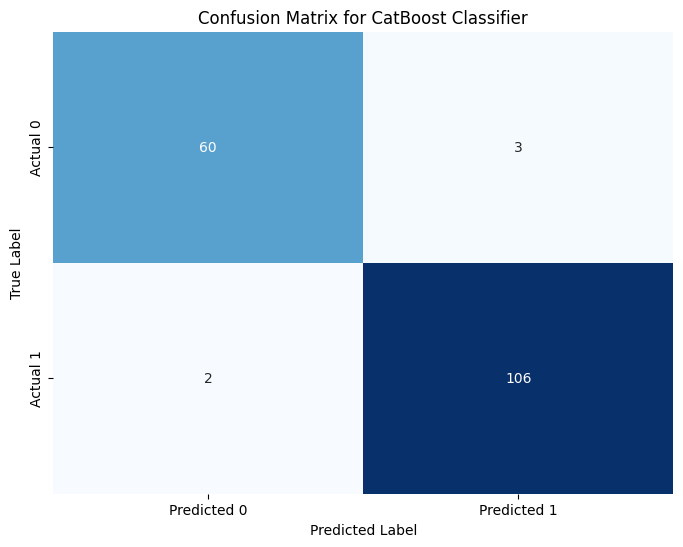

In [8]:
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# X_train, X_test, y_train, y_test are already loaded from previous questions (Breast Cancer dataset).

# Initialize the CatBoost Classifier
# Setting verbose=0 to suppress training output
catboost_model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, loss_function='Logloss', random_seed=42, verbose=0)

# Train the model
catboost_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_catboost = catboost_model.predict(X_test)

# Calculate accuracy
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
print(f"CatBoost Classifier Accuracy on Breast Cancer Dataset: {accuracy_catboost:.4f}")

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_catboost)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for CatBoost Classifier')
plt.show()

#Question 10: You're working for a FinTech company trying to predict loan default using customer demographics and transaction behavior.
#The dataset is imbalanced, contains missing values, and has both numeric and categorical features.
#Describe your step-by-step data science pipeline using boosting techniques:
- Data preprocessing & handling missing/categorical values
- Choice between AdaBoost, XGBoost, or CatBoost
- Hyperparameter tuning strategy
- Evaluation metrics you'd choose and why
- How the business would benefit from your model

## Data Science Pipeline for Loan Default Prediction (FinTech Company)

Given an imbalanced dataset with missing values, and both numeric and categorical features, here's a step-by-step data science pipeline using boosting techniques to predict loan default:

### 1. Data Preprocessing & Handling Missing/Categorical Values

*   **Missing Values:**
    *   **Numerical:** Median imputation (robust to outliers in financial data) as the primary approach. For larger proportions of missing data, KNN imputation could be explored.
    *   **Categorical:** Mode imputation or creating a new `'Missing'` category if missingness is informative.
*   **Categorical Features:**
    *   **Low Cardinality:** One-Hot Encoding to avoid ordinal assumptions.
    *   **High Cardinality:** Target Encoding (with smoothing/cross-validation to prevent leakage) or, ideally, leverage CatBoost's native handling.

### 2. Choice of Boosting Algorithm: CatBoost (Recommended)

**Recommendation: CatBoost**

*   **Justification:** CatBoost is the most suitable due to its superior handling of mixed data types.
    *   **Native Categorical Handling:** Employs Ordered Target Statistics to transform categorical features without explicit encoding, preventing target leakage and high dimensionality, especially crucial for loan datasets rich in demographic/behavioral categories.
    *   **Built-in Missing Value Handling:** Can process missing values natively, reducing manual imputation effort.
    *   **Robustness to Overfitting:** Its ordered boosting scheme and regularization make it less prone to overfitting, vital for imbalanced and critical financial predictions.

*   **Why not others?**
    *   **XGBoost:** A strong contender, but requires manual preprocessing of categorical features, which CatBoost handles more elegantly and robustly.
    *   **AdaBoost:** Less ideal due to sensitivity to noisy data/outliers, and lack of native support for categorical features and missing values, requiring extensive and potentially error-prone preprocessing.

### 3. Hyperparameter Tuning Strategy

*   **Search Methods:** Start with **RandomizedSearchCV** for broad exploration, then refine with **GridSearchCV** in promising regions of the hyperparameter space.
*   **Cross-Validation:** Use **Stratified K-Fold Cross-Validation** to ensure each fold maintains the same class distribution as the original imbalanced dataset, providing reliable performance estimates.
*   **Imbalance Handling:** Incorporate **class weighting** (e.g., `scale_pos_weight` in XGBoost/CatBoost) during tuning to give more importance to the minority class (defaults). Consider sampling techniques (e.g., SMOTE) applied within cross-validation folds.

### 4. Evaluation Metrics (and why Accuracy is misleading)

Standard accuracy is misleading for imbalanced datasets because a model can achieve high accuracy by simply predicting the majority class, failing to identify the critical minority class (defaulters).

Appropriate metrics:
*   **Recall (Sensitivity):** Crucial for minimizing False Negatives (missed defaulters), reducing financial losses.
*   **Precision:** Important for minimizing False Positives (incorrectly flagging non-defaulters), avoiding customer dissatisfaction.
*   **F1-Score:** Balances Precision and Recall, providing a holistic measure of performance.
*   **AUC-ROC (Area Under the Receiver Operating Characteristic Curve):** Evaluates the model's overall discriminative power across various thresholds, less sensitive to class imbalance.
*   **AUC-PR (Area Under the Precision-Recall Curve):** Often preferred for highly imbalanced datasets as it focuses on the performance of the minority class, giving a more realistic view than AUC-ROC.

### 5. Business Benefits

Implementing this model provides significant tangible benefits for the FinTech company:

*   **Reduced Financial Losses:** Proactively identifies high-risk loans, minimizing write-offs and bad debt provisions.
*   **Improved Risk Assessment:** Offers granular, data-driven risk profiling, acting as an early warning system for potential defaults.
*   **Enhanced Decision-Making:** Enables faster, more consistent, and objective lending decisions, reducing human bias.
*   **Optimized Resource Allocation:** Directs collection efforts more efficiently and allows for targeted marketing of loan products.
*   **Customized Products:** Insights facilitate the development of tailored loan products with differentiated terms, attracting a broader, creditworthy customer base.

This pipeline empowers the FinTech company to move from reactive to proactive risk management, leading to greater financial stability and a competitive edge.